In [1]:
import pyforest
# !jupyter nbextension enable --user
# !jt -r
!jt -t chesterish

In [2]:
os.chdir('../')
os.getcwd()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'/Users/shubhamsoni/Documents/kaggle/techStack/kaggle_ml_stack'

In [3]:
train = pd.read_csv('data/raw/dont-overfit-ii/train.csv')
test = pd.read_csv('data/raw/dont-overfit-ii/test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
# from pycaret.classification import *
train.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,1,0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,2,0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,3,1,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,4,0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643


In [5]:
train.target=train.target.astype('int')

In [6]:
train.target.value_counts()

0    183
1     67
Name: target, dtype: int64

In [14]:
train.describe()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,0.268000,-0.098064,0.001208,0.090680,-0.122248,0.011500,-0.116624,0.006932,0.100988,...,0.013052,0.007500,0.000452,0.060276,-0.090308,-0.040728,-0.002132,-0.012540,-0.039904,0.073236
std,72.312977,0.443806,0.996063,0.955117,0.968065,0.933001,0.945662,1.081705,1.014091,1.028042,...,1.027845,1.048169,1.026398,1.048744,1.008657,1.051273,1.065524,0.958744,0.948251,0.924989
min,0.000000,0.000000,-3.181000,-3.041000,-2.967000,-2.898000,-2.837000,-3.831000,-2.873000,-2.489000,...,-2.824000,-2.971000,-3.592000,-3.071000,-2.621000,-3.013000,-3.275000,-2.665000,-3.006000,-2.471000
25%,62.250000,0.000000,-0.756250,-0.624750,-0.515750,-0.695500,-0.678000,-0.758500,-0.646250,-0.589000,...,-0.764000,-0.729250,-0.699750,-0.589000,-0.701000,-0.696750,-0.555750,-0.677500,-0.719750,-0.559000
50%,124.500000,0.000000,-0.064500,-0.008000,0.067500,-0.090000,0.028000,-0.073500,-0.076500,0.104500,...,0.017500,0.053000,0.029500,0.042500,-0.102000,-0.057000,0.094500,-0.025500,-0.027500,0.160500
75%,186.750000,1.000000,0.647750,0.493250,0.716000,0.436250,0.625250,0.554250,0.676500,0.717000,...,0.690500,0.665000,0.670750,0.713250,0.532250,0.727000,0.590000,0.671000,0.717000,0.711000
max,249.000000,1.000000,2.347000,3.138000,2.609000,2.590000,2.413000,2.687000,2.793000,3.766000,...,2.773000,2.701000,3.193000,4.280000,2.716000,3.074000,2.626000,2.388000,2.730000,3.401000


In [7]:
from pycaret.classification import *

In [82]:
exp1 = setup(session_id=42,
             data=train, target='target',
             normalize=True, 
             create_clusters=True,
             polynomial_features=True,
             trigonometry_features=True,
             train_size=0.8,
             feature_selection=True,
             feature_selection_threshold=0.4
            )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(250, 302)"
4,Missing Values,False
5,Numeric Features,301
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


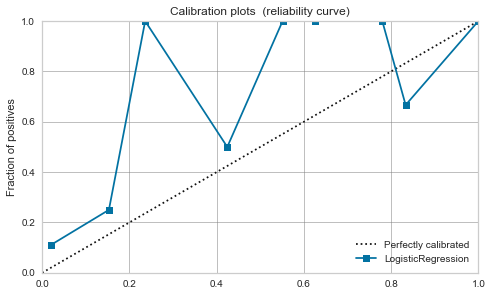

In [83]:
lr = create_model('lr')
plot_model(lr, plot='calibration')

In [32]:
exp2 = setup(session_id=42,
             data=train, target='target',
             normalize=True, 
             create_clusters=True,
             polynomial_features=True,
             trigonometry_features=True,
             train_size=0.99,
             feature_selection=True,
             feature_selection_threshold=0.4
            )

lda = create_model('lda')
log = create_model('lr')
svm = create_model('svm')

blnd = blend_models([lda,log,svm])

stck = stack_models([lda,log,svm])

y_hat = predict_model(stck, data=test)

sub = y_hat[['id','Label']]
sub.columns = ['id','target'];sub.head()

# pd.read_csv('data/raw/dont-overfit-ii/sample_submission.csv').head()
sub.to_csv('../../competitions/dont_overfit_sub02.csv',index=False)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(250, 302)"
4,Missing Values,False
5,Numeric Features,301
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [74]:
exp3 = setup(session_id=42,
             data=train, target='target',
             normalize=True, 
             create_clusters=True,
             polynomial_features=True,
             trigonometry_features=True,
             ignore_low_variance=True,
             train_size=0.7,
             feature_selection=True,
             feature_selection_threshold=0.5
            )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(250, 302)"
4,Missing Values,False
5,Numeric Features,301
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [75]:
compare_models()

IntProgress(value=0, description='Processing: ', max=170)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:49:13
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Model
ETC,. . . . . . . . . . . . . . . . . .,0.0 Seconds Remaining


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.8042,0.0000,0.475,0.7233,0.5369,0.4267
1,Logistic Regression,0.7997,0.8310,0.360,0.8000,0.4587,0.3704
2,Linear Discriminant Analysis,0.7837,0.7391,0.450,0.6417,0.5149,0.3859
3,Extreme Gradient Boosting,0.7356,0.6108,0.090,0.3500,0.1400,0.0867
4,Random Forest Classifier,0.7304,0.5262,0.100,0.3500,0.1524,0.0764
5,K Neighbors Classifier,0.7301,0.5651,0.000,0.0000,0.0000,0.0000
6,Extra Trees Classifier,0.7301,0.6606,0.000,0.0000,0.0000,0.0000
7,Gradient Boosting Classifier,0.6778,0.6136,0.130,0.2450,0.1594,0.0160
8,Light Gradient Boosting Machine,0.6778,0.5155,0.065,0.2333,0.0983,-0.0298
9,SVM - Linear Kernel,0.6670,0.0000,0.740,0.4393,0.5392,0.3104


KeyboardInterrupt: 

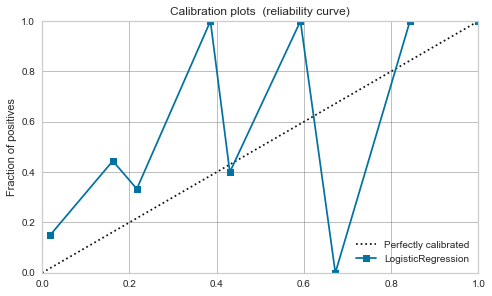

In [76]:
lr = create_model('lr')
plot_model(lr, plot='calibration')

In [77]:
cal_lr = calibrate_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7222,0.6923,0.200,0.5000,0.2857,0.1509
1,0.8333,0.8462,0.600,0.7500,0.6667,0.5574
2,0.8333,0.9077,0.800,0.6667,0.7273,0.6087
3,0.8333,0.8000,0.400,1.0000,0.5714,0.4906
4,0.8235,0.7692,0.250,1.0000,0.4000,0.3377
5,0.8235,0.9423,0.250,1.0000,0.4000,0.3377
6,0.8235,0.7308,0.500,0.6667,0.5714,0.4632
7,0.8235,0.9167,0.400,1.0000,0.5714,0.4848
8,0.7647,0.8500,0.200,1.0000,0.3333,0.2609
9,0.8235,0.9000,0.400,1.0000,0.5714,0.4848


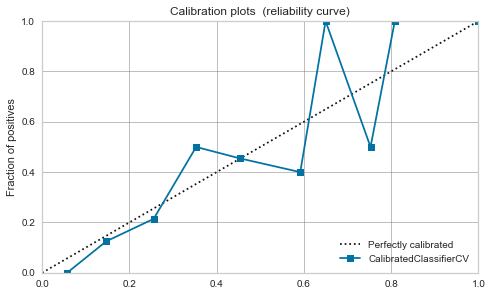

In [78]:
plot_model(cal_lr, plot='calibration')

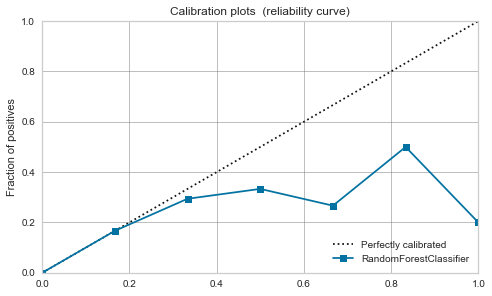

In [81]:
rf = create_model('rf')
plot_model(rf, plot='calibration')

In [65]:
y_hat = predict_model(lr, data=test)

sub = y_hat[['id','Label']]
sub.columns = ['id','target'];sub.head()

# pd.read_csv('data/raw/dont-overfit-ii/sample_submission.csv').head()
sub.to_csv('../../competitions/dont_overfit_sub05.csv',index=False)

In [66]:
!kaggle competitions submit -c dont-overfit-ii -f ../../competitions/dont_overfit_sub05.csv -m "Message"

100%|████████████████████████████████████████| 144k/144k [00:09<00:00, 15.1kB/s]
Successfully submitted to Don't Overfit! II